In [1]:
# Sequential model 
# We are using the Dense layer which is just a simple layer of neurorsn where each neuron is 
# connevcted with anither neuron
# For binary classification problems, we use the loss as binary_crossentropy[- (y * log(p) + (1-y) * log(1-p))] and for 
# multiclass classification we use categorical_crossentropy loss function[- sum(y * log(p))] and for multi-label
# classification problem we use sigmoid cross entropy[- sum(y * log(sigmoid(logits)) + (1 - y) * log(1 - sigmoid(logits)))].
# for regression based problems we can use MSE[Mean squared error]
# Batch size is basically a set of training examples that are processed together 
# whereas epoch is how many times we need the model to pass through the training set to learn and adjust the parameters.
# we can manage the epochs as well that the model will stopon its own when it has achived a required loss
# model.history.history will gives us the loss curve.
# model_loss=pd.DataFrame(model.history.history)
# model_loss.plot()
# we may take the neuron based on the size of the input features for the first coulmn
# if we observe that the validation loss is also going down with the model loss we can continue training 
# the data without the fear of overfitting.
# If the validation loss is going down with the model loss, it is a good sign that the model is generalizing well and is not overfitting to the training data. However, it does not guarantee that the model 
# will not overfit in the future if training is continued for too long.
# and if we observe that the validation loss is showing spikes in the data we can just stop the model training at that point so as to avoid 
# overfitting of the model.
# model.fit(x_train,Y_train,validation_Data=(x_validate,y_validate)), this will generate the validation loss for us to work on.
# Early stopping of the training, based on the validation data.
# from.temsorflow.keras.callbacks import EarlyStopping, we can use the early stopping with a lot of parameters like patience etc.
# for preventing the model to overfit the data. 
# early_stop = EarlyStopping(monitor ='val_loss',mode='min',verbose=1,patience=25) to wait for atleast 25 epocs before stopping to avoid the noise in our data.
# we pass this early stop in callbacks parametres of the model.fit as
# model.fit(x_train,Y_train,validation_Data=(x_validate,y_validate),callbacks=[early_stop]),
# use of exlpained_variance_score tells us how much variance is bieng explained by our model,
# dropout layers, will drop a user defined percentage of neuron uints in the previous layer of every batch , this id one to avoid overfitting
# from tensorflow.keras.layers import Dropout, and we define the dropout percentage in order to drop the data out.
# model.add(Dropout(0.5))
# if our training loss is keeping on getting down while our validation loss increases we see an overfitting  

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [4]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

C:\Users\100850993\AppData\Local\Temp\ipykernel_2828\2567533633.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [5]:
# we will be only using some of teh important columns that we have identified in the Kaggle.
data=data[['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','title','zip_code','addr_state','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']]

In [6]:
# modefied data based of the important features [the important features are based of the given kaggle input to us]
data.head() # we have now like 27 columns excluding the index column

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0


<Axes: >

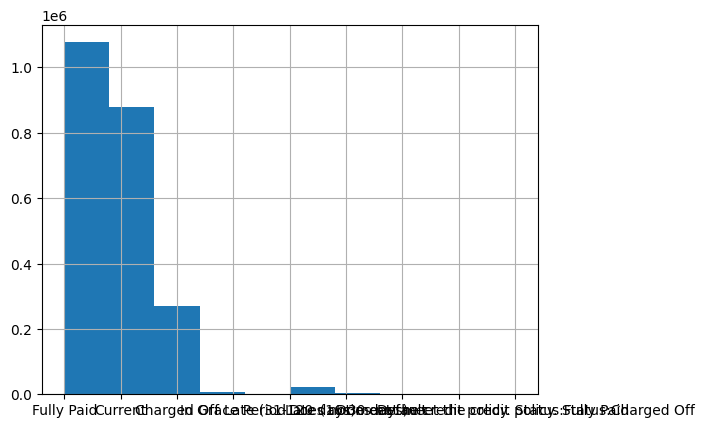

In [7]:
data['loan_status'].hist()

In [8]:
data=data[(data['loan_status']=='Fully Paid') | (data['loan_status']=='Charged Off')]

<Axes: >

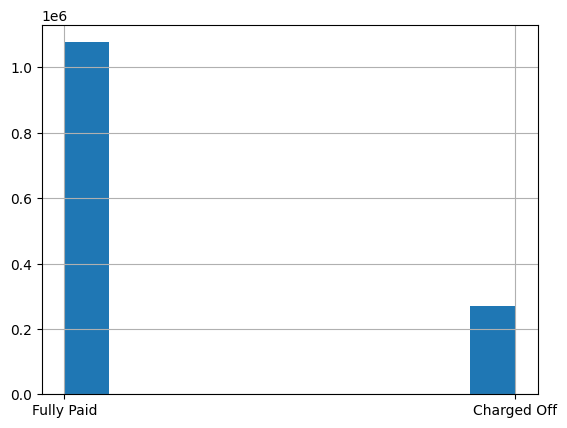

In [9]:
data['loan_status'].hist()
# we observe a difference in the fully_paid and charged of data, we are currently doing binary classification on this data to better
# understand the basic concepts of our data.

In [10]:
data.isna().sum() # we can observe a lot of null values in our data that are still present there fore we need to take care of them 
# but I will be taking care of them a little late after the preprocessing of the data is done by me.

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               85785
emp_length              78511
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                   16660
zip_code                    1
addr_state                  0
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
dtype: int64

<Axes: xlabel='loan_amounts', ylabel='Number of people'>

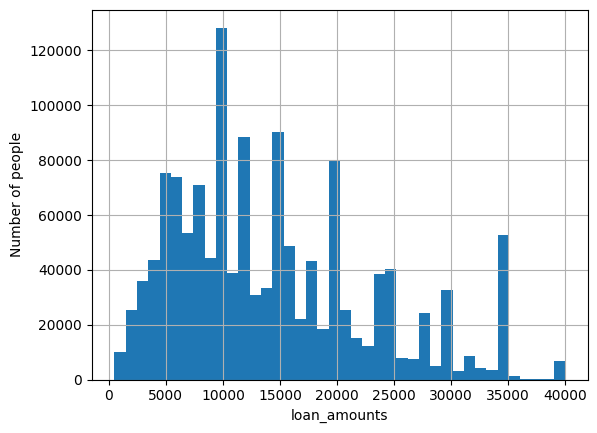

In [11]:
plt.xlabel('loan_amounts')
plt.ylabel('Number of people')
data.loan_amnt.hist(bins=40) # we can see the distribnution of loan amounts based that 

In [47]:
data.term.value_counts() # have only two values so we can use one hot encoding

term
 36 months    1020743
 60 months     324567
Name: count, dtype: int64

In [48]:
data['term']=pd.get_dummies(data['term'],dtype=int,drop_first=True)

In [50]:
data['term'] # 36 months as 0 and 60 months as 1

0          0
1          0
2          1
4          1
5          0
          ..
2260688    1
2260690    1
2260691    1
2260692    1
2260697    1
Name: term, Length: 1345310, dtype: int32

In [51]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,0,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,...,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,0,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,...,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,1,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,...,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
4,10400.0,1,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,...,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,0,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,...,Oct-1987,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


In [52]:
data.grade.value_counts()# we can use label encoding here given that A is the 1 follwed by others

grade
B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
lr=LabelEncoder()

In [66]:
data['grade']=lr.fit_transform(data['grade'])+1

In [67]:
lr.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [68]:
lr.transform(lr.classes_)+1

array([1, 2, 3, 4, 5, 6, 7])

In [69]:
data['grade'].value_counts()# we can observe that it matches the output 

grade
2    392741
3    381686
1    235090
4    200953
5     93650
6     32058
7      9132
Name: count, dtype: int64

In [70]:
data.sub_grade.value_counts() # we have a lot of grades here we can't use the label encoder here directly there fore I have to 

sub_grade
C1    85494
B4    83199
B5    82538
B3    81827
C2    79213
C3    74998
C4    74421
B2    74024
B1    71153
C5    67560
A5    64003
A4    52235
D1    51321
D2    44848
A1    43678
D3    39317
A3    37996
A2    37178
D4    35566
D5    29901
E1    23749
E2    21377
E3    18387
E4    15720
E5    14417
F1     9970
F2     7198
F3     6088
F4     4859
F5     3943
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: count, dtype: int64

In [13]:
data.select_dtypes(include='object').columns
# there are a lot of categorical columns that we have to deal with.

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [28]:
data=data.sample(random_state=42,frac=0.2945)
# I have reduced the size of data and have taken about 30% from the entire fdataset

In [41]:
data.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               7475
emp_length              6826
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1394
zip_code                   0
addr_state                 0
dti                       37
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                62
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                4079
pub_rec_bankruptcies      56
dtype: int64

In [43]:
data['emp_title'].value_counts()# A lot of unique titiles here 

emp_title
Teacher                    1843
Manager                    1698
Owner                       859
RN                          782
Registered Nurse            740
                           ... 
Miami Air International       1
Programemr                    1
Hvac tech supervisor          1
IT Manager / Assistant        1
Shop Supervisors              1
Name: count, Length: 50351, dtype: int64

In [44]:
data.drop('emp_title',inplace=True,axis=1)

<Axes: xlabel='emp_length', ylabel='count'>

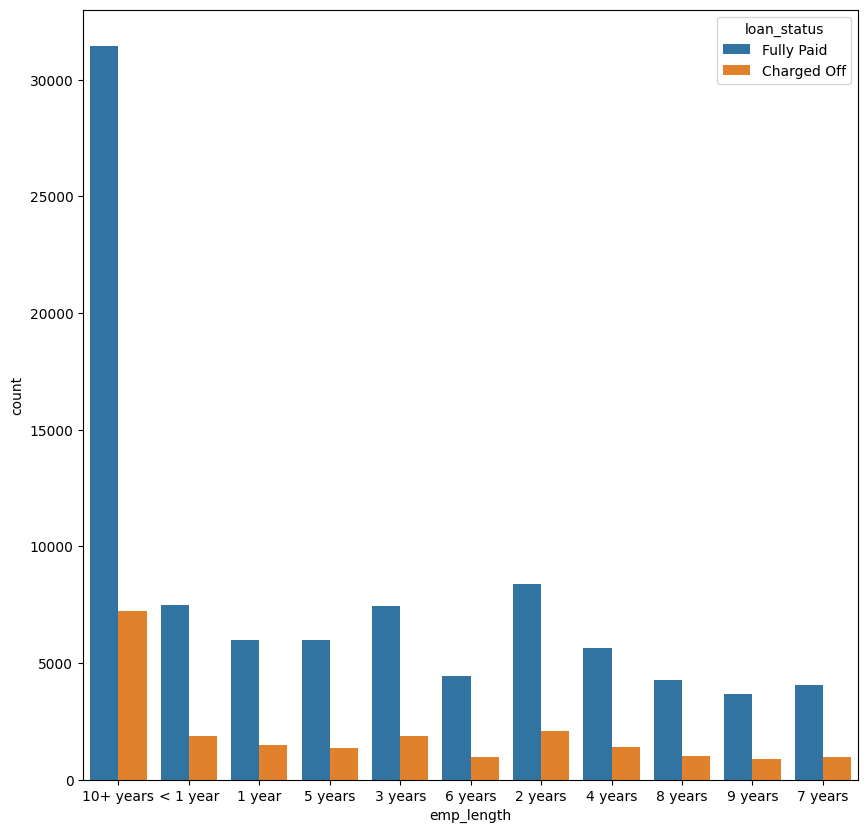

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(x=(data['emp_length']),data=data,hue='loan_status')

In [73]:
# how many percent of people actually paid off based on their employment types, basically find the a #
# ratio of how many people paid back in which category and how many didin't
abc=data[['emp_length','loan_status']]
abc_co=abc[abc['loan_status']=='Charged Off'].groupby('emp_length')['loan_status'].count()       
abc_fp=abc[abc['loan_status']=='Fully Paid'].groupby('emp_length')['loan_status'].count()

In [77]:
abc_co/(abc_fp+abc_co) # this suggest us that there is not much differnce in the percentage of changes.
# all thecategories have around 20% of people who are charged off
# as there is very similarity  nad no information that we are getting off from this therefore we will drop the columns off.

emp_length
1 year       0.200938
10+ years    0.186476
2 years      0.199043
3 years      0.200323
4 years      0.196799
5 years      0.186461
6 years      0.181902
7 years      0.192788
8 years      0.192996
9 years      0.193257
< 1 year     0.201601
Name: loan_status, dtype: float64

In [78]:
data.drop('emp_length',axis=1,inplace=True)

In [79]:
# title an dpurpose have the same meanings
data[['title','purpose']] # and they are basically one and the same thing therfore dropping off title would be a good choice

,title,purpose
107235,Medical expenses,medical
124239,Debt consolidation,debt_consolidation
1858328,Refinance,credit_card
2094253,Debt consolidation,debt_consolidation
652755,Debt consolidation,debt_consolidation
...,...,...
1953043,Debt consolidation,debt_consolidation
2012809,Debt consolidation,debt_consolidation
2035389,Car financing,car
505701,Other,other


In [80]:
data.drop('title',axis=1,inplace=True)

In [82]:
data['mort_acc'].value_counts() # to find out how many unique values are here as this is the column which has a lot of misisng values 
# and is one of the important 
# the main problem that we have for this is that how would we determine, how to fill in this data, for that we need to find the 
# correlation of this with other features.

mort_acc
0.0     45342
1.0     19594
2.0     16373
3.0     12038
4.0      8251
5.0      5101
6.0      2844
7.0      1479
8.0       761
9.0       375
10.0      177
11.0      118
12.0       54
13.0       31
15.0       18
14.0       13
17.0        7
16.0        7
18.0        6
21.0        4
19.0        4
25.0        1
20.0        1
24.0        1
Name: count, dtype: int64

In [83]:
num_cols=data.select_dtypes(include=['float','int']).columns

<Axes: >

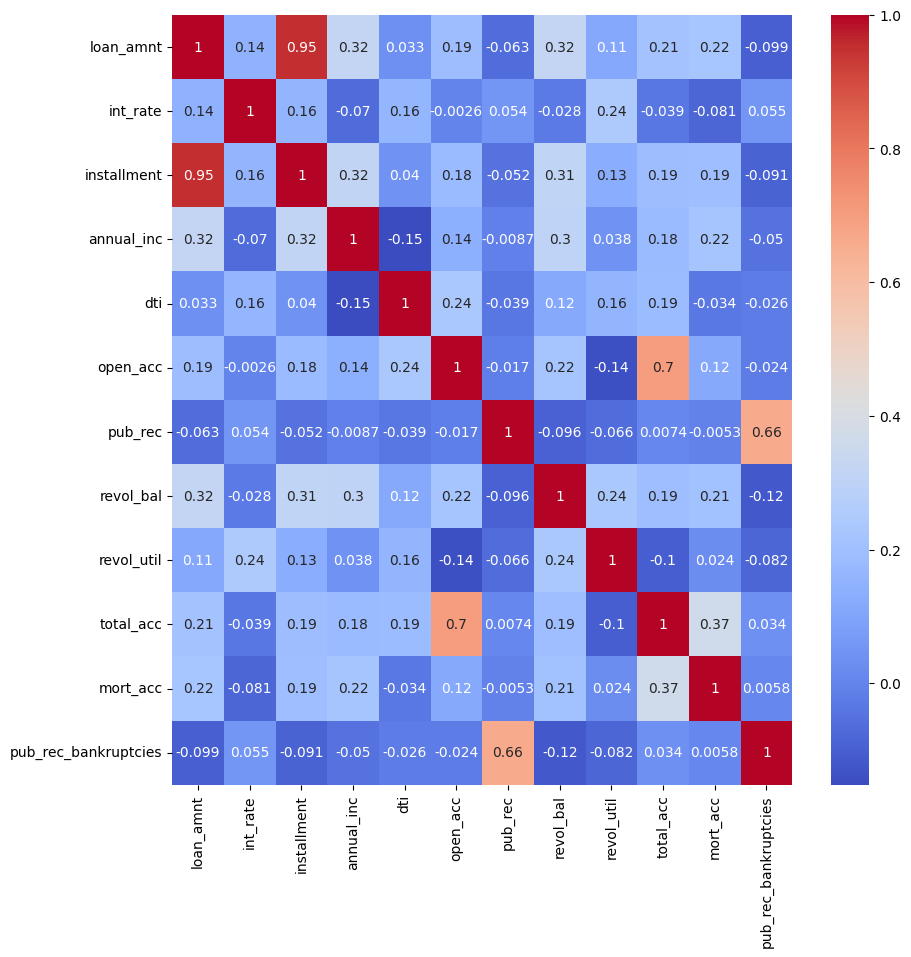

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(data[num_cols].corr(),annot=True,cmap='coolwarm')
# we observe that mott_acc do not have a high correlation with any of the given features, except_ totola_acc 

In [105]:
# so we are going to fill the vaues based of total_acc in mort_acc
data_t_m=data[['total_acc','mort_acc']].reset_index(drop=True)
data_t_m.groupby('total_acc').mean()['mort_acc'] # based on total accounts we are getting the average of mort_accounts 
# we can use this avergae to fill in the missing values of the mort_acc

total_acc
2.0      0.000000
3.0      0.020202
4.0      0.063953
5.0      0.142857
6.0      0.151844
           ...   
114.0    4.000000
115.0    0.000000
116.0    2.000000
125.0    1.000000
126.0    4.000000
Name: mort_acc, Length: 110, dtype: float64

In [106]:
total_acc_avg=data_t_m.groupby('total_acc').mean()['mort_acc']

In [107]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.020202
4.0      0.063953
5.0      0.142857
6.0      0.151844
           ...   
114.0    4.000000
115.0    0.000000
116.0    2.000000
125.0    1.000000
126.0    4.000000
Name: mort_acc, Length: 110, dtype: float64

In [108]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [114]:
l=[]
for i in range(len(data_t_m)):
    l.append(fill_mort_acc(data_t_m['total_acc'][i],data_t_m['mort_acc'][i]))

In [115]:
l # filled the missing values now we need to assign these values.

[3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4979955456570155,
 2.0,
 0.0,
 3.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 2.0,
 4.0,
 2.0,
 0.0,
 1.0,
 1.0,
 0.0,
 3.0,
 1.0,
 5.0,
 0.0,
 0.0,
 3.0,
 1.0,
 2.0,
 2.0,
 3.0,
 1.0,
 3.0,
 2.0,
 0.0,
 2.0,
 4.0,
 1.0,
 0.0,
 5.0,
 0.0,
 3.0,
 1.0,
 3.0,
 3.0,
 0.0,
 1.0,
 3.0,
 0.0,
 2.0,
 6.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 4.0,
 3.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 5.0,
 3.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 4.0,
 0.0,
 4.0,
 0.0,
 5.0,
 3.0,
 2.0,
 0.0,
 1.0,
 3.0,
 4.0,
 4.0,
 5.0,
 1.0,
 0.0,
 4.0,
 0.0,
 2.344812362030905,
 0.0,
 0.0,
 0.0,
 3.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 3.0,
 0.0,
 2.0,
 1.0,
 3.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 4.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 2.0,
 3.0,
 0.0,
 9.0,
 5.0,
 1.0,
 5.0,
 5.0,
 0.0,
 5.0,
 6.0,
 1.0,
 1.8577824598367132,
 6.0,
 1.0,
 3.0,
 2.0,
 1.0,
 0.0,
 1.0,
 4.0,
 2.0,
 0.0,
 1.0,
 6.0,
 1.0,
 2.0,
 1.0,
 3.0,
 3.0,
 1.0,
 1.0,
 0.0,
 0.0,
 7.0,
 0

In [116]:
data['mort_acc']=l

In [117]:
data.isna().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
zip_code                 0
addr_state               0
dti                     37
earliest_cr_line         0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              62
total_acc                0
initial_list_status      0
application_type         0
mort_acc                 0
pub_rec_bankruptcies    56
dtype: int64

In [120]:
# we can drop our rows for these values
data=data.dropna()
data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [124]:
data.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

In [132]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [158]:
d={' 36 months':36,' 60 months':60}
data['term']=data['term'].map(d)

In [134]:
data['grade'].unique()

array(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype=object)

In [137]:
data['sub_grade'].unique()
# as we can see here that the sub_grade already have information regarding the grade columns so we can drop the grade column
# and I am going to drop the address columns as well
data.drop('grade',inplace=True,axis=1)

In [138]:
dummies=pd.get_dummies(data['sub_grade'],dtype=int)
# if w ehave mutiple columns it will just reduce it by one if we add drop_first=true like A/B/C/D will only have b/c/d.

In [140]:
data = pd.concat([data.drop('sub_grade',axis=1),dummies],axis=1)
# we have the subgrade replaced by columns.

In [141]:
dummies=pd.get_dummies(data['verification_status'],dtype=int)
data = pd.concat([data.drop('verification_status',axis=1),dummies],axis=1)

In [142]:
dummies=pd.get_dummies(data['purpose'],dtype=int)
data = pd.concat([data.drop('purpose',axis=1),dummies],axis=1)

In [143]:
dummies=pd.get_dummies(data['application_type'],dtype=int)
data = pd.concat([data.drop('application_type',axis=1),dummies],axis=1)

In [144]:
dummies=pd.get_dummies(data['initial_list_status'],dtype=int)
data = pd.concat([data.drop('initial_list_status',axis=1),dummies],axis=1)
# after this data ahve 75 columns

In [148]:
data['home_ownership'].value_counts()
# its not better to add the extra columns just for Any / other and None category.

home_ownership
MORTGAGE    57843
RENT        45971
OWN         12666
ANY            25
OTHER          15
NONE            4
Name: count, dtype: int64

In [150]:
data['home_ownership'].replace(['ANY','NONE'],'OTHER',inplace=True)

In [151]:
dummies=pd.get_dummies(data['home_ownership'],dtype=int)
data = pd.concat([data.drop('home_ownership',axis=1),dummies],axis=1)

In [136]:
data['addr_state'].unique() # we can visualize the data based on these columns but they are useless 

array(['AL', 'AZ', 'TX', 'CT', 'NY', 'MA', 'AR', 'CA', 'NJ', 'NC', 'LA',
       'OR', 'NH', 'WI', 'CO', 'SC', 'RI', 'MN', 'PA', 'TN', 'IL', 'MI',
       'MD', 'ME', 'FL', 'WV', 'NV', 'MO', 'VA', 'WA', 'OH', 'OK', 'SD',
       'UT', 'GA', 'KY', 'KS', 'IN', 'DC', 'HI', 'NE', 'MT', 'WY', 'MS',
       'AK', 'VT', 'NM', 'DE', 'ND', 'ID', 'IA'], dtype=object)

In [155]:
data['zip_code'].value_counts() # too much values that's why we hav eto drop it 

zip_code
945xx    1334
112xx    1238
750xx    1237
300xx    1070
606xx    1046
         ... 
507xx       1
821xx       1
576xx       1
649xx       1
340xx       1
Name: count, Length: 886, dtype: int64

In [160]:
data.drop(['addr_state','zip_code'],inplace=True,axis=1) # as I already Dropped it ...

KeyError: "['addr_state', 'zip_code'] not found in axis"

In [161]:
data.select_dtypes(include=['object']).columns # only left with two columns as of now

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

In [162]:
data.drop(['issue_d','earliest_cr_line'],axis=1,inplace=True)

In [163]:
# only left with output categorical column

In [164]:
from sklearn.model_selection import train_test_split

In [166]:
y=data['loan_status']
x=data.drop('loan_status',axis=1)
y=pd.get_dummies(y,drop_first=True,dtype=int)
x=x.values

In [174]:
y=y.values

In [210]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [211]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [195]:
X_train.shape[1]

73

In [207]:
y_train.shape[1]

1

In [208]:
X_test.shape[1]

73

In [209]:
y_test.shape[1]

73

In [177]:
import tensorflow as tf 

In [228]:
# Define and compile your model
model = Sequential()
model.add(Dense(73, activation='relu', input_shape=(73,)))
model.add(Dropout(0.2))
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train your model
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/25
365/365 [==============================] - 2s 3ms/step - loss: 0.4858 - val_loss: 0.4575
Epoch 2/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4633 - val_loss: 0.4563
Epoch 3/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4593 - val_loss: 0.4574
Epoch 4/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4568 - val_loss: 0.4541
Epoch 5/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4552 - val_loss: 0.4541
Epoch 6/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4541 - val_loss: 0.4540
Epoch 7/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4541 - val_loss: 0.4537
Epoch 8/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4528 - val_loss: 0.4535
Epoch 9/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4528 - val_loss: 0.4535
Epoch 10/25
365/365 [==============================] - 1s 3ms/step - loss: 0.4517 - val_loss: 0.4544

In [229]:
loss_df=pd.DataFrame(model.history.history)

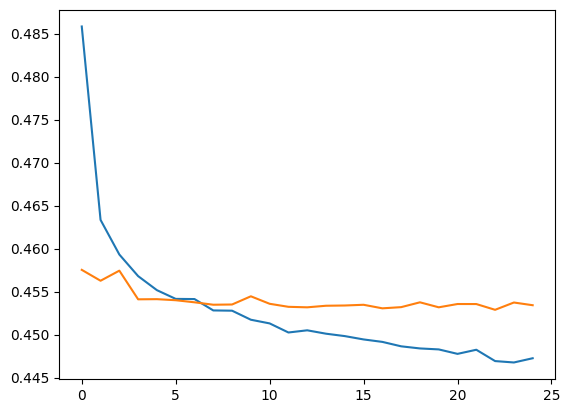

In [230]:
plt.plot(loss_df) 
# reducing the loss but the model is overfitting and is not agood model therefore we need to look for another models.

In [238]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [236]:
y_pred_proba=model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

729/729 [==============================] - 1s 847us/step


In [237]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.02      0.05      4634
           1       0.80      1.00      0.89     18671

    accuracy                           0.80     23305
   macro avg       0.68      0.51      0.47     23305
weighted avg       0.76      0.80      0.72     23305



In [239]:
roc_auc_score(y_test,y_pred_proba) # our model is 71% correct.

0.7117479379151154